In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [95]:
sourceAddress = '/Users/jungpeter/Desktop/Develop/project/BEST/iOS_RSSI_Distance_Experiment_CSV/exp3/'
aosSourceAddress = '/Users/jungpeter/Desktop/Develop/project/BEST/AOS_RSSI_Distance_Experiment_CSV/exp3/'

ios_dfs = []
aos_dfs = []
dist = [item*0.5 for item in range(1, 11)]

ios_rssi_stat = {'dist': dist, 'mean': [], 'median': [], 'mod': []}
aos_rssi_stat = {'dist': dist, 'mean': [], 'median': [], 'mod': []}
ios_rssi = {'raw': [], 'filtered': [], 'error': [], 'dist(m)': []}
aos_rssi = {'raw': [], 'filtered': [], 'error': [], 'dist(m)': []}
data_limit = 250
idx = -1


for i in dist:
    ios_dfs.append(pd.read_csv(sourceAddress+f'iOS_exp3_{i}.csv'))
    aos_dfs.append(pd.read_csv(aosSourceAddress+f'AOS_exp3_{i}.csv'))

In [96]:
for df in ios_dfs:
    newTS = []
    for timestamp in df["timeStamp"]:
        newTS.append(timestamp)
    total_len = len(newTS)
    left = total_len // 2
    right = total_len // 2 + 1
    result = []
    idx = idx + 1
    
    # 250 개가 되지 않을때
    if total_len < data_limit:
        
        for raw in df['raw']:
            ios_rssi['raw'].append(raw)
            
        for filtered in df['filtered']:
            ios_rssi['filtered'].append(filtered)
            
        for error in df['error']:
            ios_rssi['error'].append(error)
            ios_rssi['dist(m)'].append(dist[idx])
            

    # 250개 이상일때
    else:
        while(True):
            if len(result) >= data_limit:
                break
            if left < 0 and right > total_len:
                break
            if left >= 0:
                result.insert(0, newTS[left])
                left = left - 1
            if right < total_len:
                result.append(newTS[right])
                right = right + 1

        first = df[df['timeStamp'] == result[0]].index.values
        last = df[df['timeStamp'] == result[-1]].index.values
        
        for raw in df[first[0]:last[0]+1]['raw']:
            ios_rssi['raw'].append(raw)
        for filtered in df[first[0]:last[0]+1]['filtered']:
            ios_rssi['filtered'].append(filtered)
        for error in df[first[0]:last[0]+1]['error']:
            ios_rssi['error'].append(error)
            ios_rssi['dist(m)'].append(dist[idx])

In [97]:
idx = 0
for df in aos_dfs:
    newTS = []
    for timestamp in df["Date"]:
        newTS.append(timestamp)
    total_len = len(newTS)
    left = total_len // 2
    right = total_len // 2 + 1
    result = []
    
    #250개 이하일때
    if total_len < data_limit:
        rssiArr = []
        
        for rssi in df['RSSI']:
            aos_rssi['raw'].append(rssi)
            aos_rssi['dist(m)'].append(dist[idx])
            
        for filtered in df['Filtered RSSI']:
            aos_rssi['filtered'].append(filtered)
            
        for error in df['Error']:
            aos_rssi['error'].append(error)

        
    # 250개 이상일때 250개 짜르기
    else:
        while(len(result) < data_limit):
            if left < 0 and right > total_len:
                break
            if left >= 0:
                result.insert(0, newTS[left])
                left = left - 1
            if right < total_len:
                result.append(newTS[right])
                right = right + 1

        first = df[df['Date'] == result[0]].index.values
        last = df[df['Date'] == result[-1]].index.values

        for rssi in df[first[0]:last[0]+1]['RSSI']:
            aos_rssi['raw'].append(rssi)
            aos_rssi['dist(m)'].append(dist[idx])
    
        for filtered in df[first[0]:last[0]+1]['Filtered RSSI']:
            ios_rssi['filtered'].append(filtered)
            
        for error in df[first[0]:last[0]+1]['Error']:
            ios_rssi['error'].append(error)
            
    idx = idx + 1

In [98]:
ios_rssi_df = pd.DataFrame(ios_rssi)

In [99]:
aos_rssi_df = pd.DataFrame(aos_rssi)

In [100]:
ios_rssi_df

,raw,filtered,error,dist(m)
0,-53,-52.47465,0.275991,0.5
1,-53,-52.48627,0.263921,0.5
2,-53,-52.49763,0.252378,0.5
3,-52,-52.48662,0.236801,0.5
4,-52,-52.47586,0.226443,0.5
...,...,...,...,...
2341,-74,-75.98413,3.936775,5.0
2342,-73,-75.91814,8.515566,5.0
2343,-76,-75.91995,0.006408,5.0
2344,-76,-75.92172,0.006127,5.0


<AxesSubplot:xlabel='dist(m)', ylabel='filtered'>

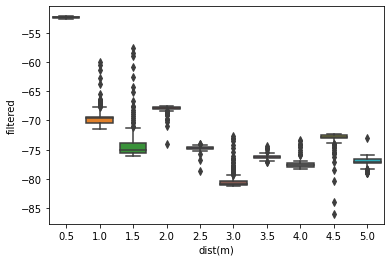

In [103]:
sns.boxplot(y = ios_rssi_df['filtered'], x = ios_rssi_df['dist(m)'])

<AxesSubplot:xlabel='dist(m)', ylabel='raw'>

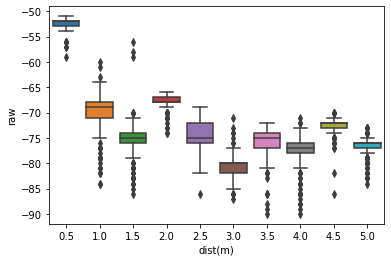

In [104]:
sns.boxplot(y = ios_rssi_df['raw'], x = ios_rssi_df['dist(m)'])

<AxesSubplot:xlabel='dist(m)', ylabel='filtered'>

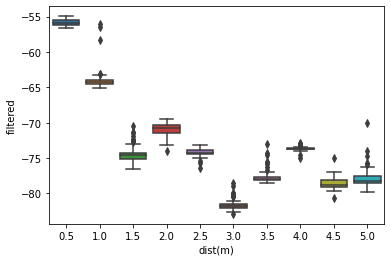

In [106]:
sns.boxplot(y = aos_rssi_df['filtered'], x = aos_rssi_df['dist(m)'])